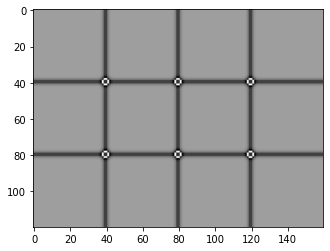

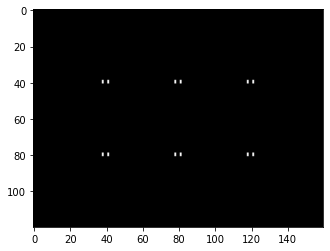

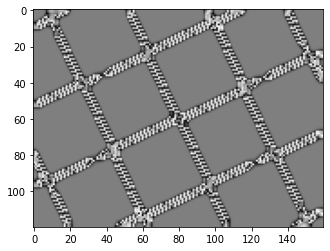

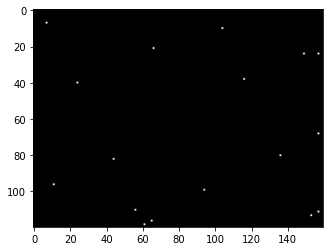

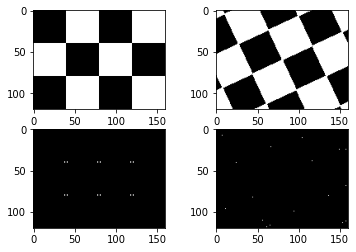

In [493]:
import import_ipynb
import Utilities as utl
import cv2
import numpy as np
import matplotlib.pyplot as plt


def NonMaximalSuppression(img, radius):
    maxpixelinwidow=img.max()
    maxm=0
    #if max in window still minimum so we want takw any pixels from this window
    #else it is bigager than pixel and big fom threshhold    ( هخليه زي ما هوا وباقي ال بيكسل اللي حولايه بالاسود )
    #اكبر من كل الي حولايه بس استيل صغير هتخلي كل الحهءثمس اللي في ال صهىيخص بالاسود
    """
     for i in range(i,len(img)):
        print(". .")
        for j in range(j,len(img[i])):
            print('loking')
            if img[i, j] > (radius/100)*maxpixelinwidow and img[i, j] > img[i-1, j-1] and img[i, j] > img[i-1, j+1]\
                                     and img[i, j] > img[i+1, j-1] and img[i, j] > img[i+1, j+1]: 
                img[i,j]=0
            else:
                img[i,j]=255
                not working
    """
   
    """
      for i in range(0,len(img),radius):
            for j in range(0,len(img[i]),radius):
                for x in range(i,i+radius):
                    print(". .")
                    for y in range(j,j+radius):
                        if img[x, y] > 0.01*maxpixelinwidow and img[x, y] > img[x-1, y-1] and img[x, y] > img[x-1, y+1]\
                                     and img[x, y] > img[x+1, y-1] and img[x, y] > img[x+1, y+1]: 
                            img[i,j]=0
                        else:
                            img[i,j]=255
                            not trying
    """  
    """
    for i in range(0,len(img),radius):
        for j in range(0,len(img[i]),radius):
            for x in range(i,i+radius):
                print(". .")
                for y in range(j,j+radius):
                    if(img[x,y]>maxm):
                         maxm=img[x,y]
            for x in range(i,i+radius):
                print(". .")
                for y in range(j,j+radius):
                    print('loking')
                    if img[x, y] > 0.01*maxpixelinwidow:
                            img[x,y]=0
                    else:
                        img[x,y]=255
                  
                  
    """
    
    # window = np.zeros(img.shape)
    for i in range(0,len(img),radius):
        for j in range(0,len(img[i]),radius):
            index1=0
            index2=0
            window = img[i:i+radius, j:j+radius]
            index_of_element1 = -1
            index_of_element2 = -1

            for x in range(len(window)):
                for y in range(len(window[x])):
                   
                    if window[x,y] == window.max() :
                            index_of_element1 = x
                            index_of_element2 = y
                            #print("element index  : ", index_of_element1, " ",index_of_element2)
                            #print("bb",np.moveaxis(np.indices((radius,radius )), 0, -1) + (index_of_element1, index_of_element2))
                            img[np.moveaxis(np.indices((radius,radius )), 0, -1) + (index_of_element1, index_of_element2)]=window.max()
                            #print(img[np.moveaxis(np.indices((radius,radius )), 0, -1) + (index_of_element1, index_of_element2)])
                       
 
            
           
            

            


            
            
    
   
    
                        
                 
    """
    consider only the max value
    within window of size(radious x radious)
    around each pixel and assume all other value with 0
    """

    return img

"""
1- gradients in both the X and Y directions.
2- smooth the derivative a little using gaussian 
> try on TransA, SimA
> save output as  lab4-1-a-1.png, lab4-1-a-1.png
3- Calculate R:
	3.1 Loop on each pixel:
	3.2 Calculate M for each pixel:
		3.2.1 calculate a11=Gx^2, a12=GxGy, a21=GxGy, a22=Gy^2 
	3.3 Calculate Det_M = np.linalg.det(a) or Det_M = a11*a22 - a12*a21; and trace=a11+a22
	3.4 Calculate Response at this pixel = det-k*trace^2
	3.5 Display the result, but make sure to re-scale the data in the range 0 to 255 
4- Threshold and Non-Maximal Suppression 

"""
# 1- gradients in both the X and Y directions.
def harris(img, thresh=200, radius=4,verbose=True):
    Gx, Gy = utl.get_gradients_xy(img, 5)
    if verbose:
        cv2.imshow("Gradients", np.hstack([Gx, Gy]))

    # 2- smooth the derivative a little using gaussian
    #Student Code ~ 2 Lines
    Gx = cv2.GaussianBlur(Gx, (5, 5), sigmaX=3,sigmaY=0)
    Gy = cv2.GaussianBlur(Gy, (5, 5), sigmaX=0,sigmaY=3)
    #End Student Code
    
    cv2.imshow("Blured", np.hstack([Gx, Gy]))
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()

    # 3- Calculate R:
    R = np.zeros(img.shape)
    k = 0.04

    # 	3.1 Loop on each pixel:
    for i in range(len(Gx)):
        for j in range(len(Gx[i])):
    # 	3.2 Calculate M for each pixel:
    # 		    M = [[a11, a12],
    #                [a21, a22]].
    #           with a11=Gx^2, a12=GxGy, a21=GxGy, a22=Gy^2
            #Student Code ~ 1 line of code
            M = np.array([[int(Gx[i,j])*int(Gx[i,j]), int(Gx[i,j])*int(Gy[i, j])],
                          [int(Gx[i,j])*int(Gy[i,j]), int(Gy[i,j])*int(Gy[i, j])]])
            #Student Code

    # 	3.3 Calculate Det_M = np.linalg.det(a) or Det_M = a11*a22 - a12*a21; and trace=a11+a22
            Det_M = np.linalg.det(M)

    # 	3.4 Calculate Response at this pixel = det-k*trace^2
    #   where trace of M is the sum of its diagonals
            #Student Code ~ 1 line of code
            R[i, j] = Det_M - k*(M[0,0]+M[1, 1])**2
            #End Student Code

    # 4 Display the result, but make sure to re-scale the data in the range 0 to 255

    R = utl.rescale(R, 0, 255)

    plt.imshow(R, cmap="gray")
    plt.show()
    # 5- Threshold and Non-Maximal Suppression
    # Student Code ~ 2 lines of code
    #R[R>thresh] = 255
    #R[R<=thresh] = 0
    #M = 0.01 * R.max()
    #M=-100
    # Threshold for an optimal value, it may vary depending on the image.
    R = NonMaximalSuppression(R, radius)
    R[R > 251] = 255
    R[R < 251] = 0
    # End Student Code
    plt.imshow(R, cmap="gray")
    plt.show()

    return R

img_pairs = [['check.bmp', 'check_rot.bmp']]
dir = 'input/'
i = 0;

for [img1,img2] in img_pairs:
    i += 1
    img1 = cv2.imread(dir+img1, 0)
    img2 = cv2.imread(dir+img2, 0)
    r1 = harris(img1)
    r2 = harris(img2) #Note that threshod may need to be different from picture to another
    plt.figure(i)
    plt.subplot(221), plt.imshow(img1, cmap='gray')
    plt.subplot(222), plt.imshow(img2, cmap='gray')
    plt.subplot(223), plt.imshow(r1, cmap='gray')
    plt.subplot(224), plt.imshow(r2, cmap='gray')
    plt.show()

In [ ]:
+++++++++++++++++++++